In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import mne
from scipy.stats import ttest_rel, ttest_1samp, ttest_ind, kstest, wilcoxon

import glob
import os

import pickle
import sys

sys.path.append('../utils')
from ERP_utils import *
from update_sub_lists import *

In [20]:
#PARAMETERS
task = 'motor'

In [125]:
#load subjects
good_listen_subjects, good_motor_subjects, musicians, nonmusicians = load_subject_lists()
subjects_to_process = good_motor_subjects

#load channels
ch_names_64, _ = load_channels()


In [ ]:

#load and organize epochs, concatenate all epochs into big lists
epochs_pre_mus, evokeds_pre_mus, epochs_post_mus, evoked_post_mus = load_evoked_epochs([x for x in good_motor_subjects if x in musicians], task)
epochs_pre_nmus, evokeds_pre_nmus, epochs_post_nmus, evoked_post_nmus = load_evoked_epochs([x for x in good_motor_subjects if x in nonmusicians], task)

In [22]:
p_channels = ['Cz', 'FCz']
p_ch_idx = ch_index(p_channels)

In [23]:
ep = epochs_pre_mus.get_data()[:, :64, :]

In [24]:
times = epochs_pre_mus.times

In [25]:
ep_mean = np.mean(ep, axis = 0)

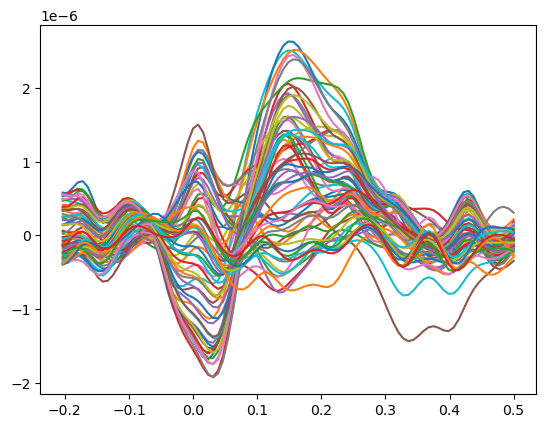

In [26]:
plt.plot(times,ep_mean.T)

In [65]:
def load_epochs_bysubject(subjects_to_process, task):


    """
    Loads the epochs and evoked .fif files and organizes them into lists to use for plotting and analysis
    subjects_to_process: list of subjects where each element is a string. e.g. ['01', '02']

    ---
    Returns concatenated epochs and evoked lists: concat_epochs_pre, concat_evoked_pre, concat_epochs_post, concat_evoked_post
    """
    
    epochs_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_epochs_data'
    epochs_df = pd.DataFrame(columns = ['subject', 'period', 'musician', 'epochs'])

    #subject averages
    #epochs_list_pre_sa =[]

    #for file in sorted(os.listdir(evoked_dir)):
    assert isinstance (subjects_to_process, list)

    for subject in subjects_to_process:
        print('Processing subject: ', subject)

        if subject in musicians: 
            musician = 1
        else: 
            musician = 0
        for period in ['pre', 'post']:
            file_epochs_pre = glob.glob(os.path.join(epochs_dir, f'{task}_epochs_{period}_{subject}.fif'))[0]
            epochs_sub = mne.read_epochs(file_epochs_pre)
            epochs_sub = np.mean(epochs_sub.get_data()[:, :64, :], axis = 0)
            #epochs_sub = epochs_sub[np.newaxis, :, :]

            df_sub = pd.DataFrame({
                'subject': subject,
                'period' : period,
                'musician' : musician,
                'epochs': [epochs_sub]
            })
            epochs_df = pd.concat([epochs_df, df_sub])


    epochs_df.reset_index(drop=True, inplace=True)
    return (epochs_df)


Processing subject:  01
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
353 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
385 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  05
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_05.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not sett

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_19868/2679323841.py:30: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_01.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_19868/2679323841.py:30: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_01.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_19868/2679323841.py:30: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data

In [126]:
epochs_bysubject = load_epochs_bysubject(subjects_to_process, 'motor')

Processing subject:  01
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
353 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
385 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  03
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_03.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not sett

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_19868/2679323841.py:30: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_01.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_19868/2679323841.py:30: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_01.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_19868/2679323841.py:30: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data

    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
344 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  07
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_07.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
297 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_07.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
277 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  08
Reading /Users/cindyzhang

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_19868/2679323841.py:30: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_07.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_19868/2679323841.py:30: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_07.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_19868/2679323841.py:30: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data

Processing subject:  12
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_12.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
287 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_12.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
258 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  13
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_13.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not sett

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_19868/2679323841.py:30: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_12.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_19868/2679323841.py:30: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_12.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_19868/2679323841.py:30: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data

Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_17.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
425 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  18
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_18.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
314 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_18.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
358 matchi

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_19868/2679323841.py:30: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_17.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_19868/2679323841.py:30: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_18.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_19868/2679323841.py:30: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data

In [127]:
max_amps = pd.DataFrame(columns = ['subject', 'period', 'musician', 'max_amp'])

for subject in subjects_to_process:
    if subject in musicians:
        musician = 1
    else: 
        musician = 0
    for period in ['pre', 'post']:
        df_sub = epochs_bysubject[(epochs_bysubject['subject'] == subject) & (epochs_bysubject['period'] == period)]

        ep_mean = df_sub['epochs'].iloc[0]
        ep_chn = ep_mean[p_ch_idx[0]]
        ep_max = np.max(ep_chn)
        
        max_amps_sub = pd.DataFrame({
        
            'subject': subject,
            'period': period,
            'musician': musician, 
            'max_amp': [ep_max]
        })

        max_amps = pd.concat([max_amps, max_amps_sub])

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_19868/284252234.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  max_amps = pd.concat([max_amps, max_amps_sub])


In [128]:
max_amps

,subject,period,musician,max_amp
0,01,pre,0,2.306761e-06
0,01,post,0,3.226225e-06
0,03,pre,0,5.261693e-06
0,03,post,0,4.054124e-06
0,04,pre,0,1.572622e-06
0,04,post,0,1.082843e-06
0,05,pre,0,3.717771e-06
0,05,post,0,2.534731e-06
0,06,pre,1,3.569530e-06
0,06,post,1,2.883942e-06


/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

<Axes: xlabel='period', ylabel='max_amp'>

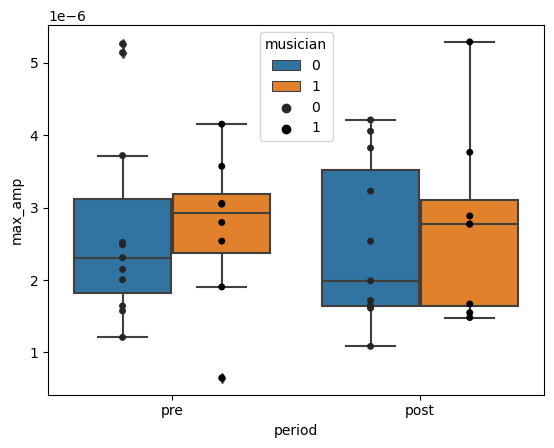

In [134]:
sns.boxplot(data = max_amps, x = 'period', y = 'max_amp', hue = 'musician')
sns.stripplot(data = max_amps, x = 'period', y = 'max_amp', hue = 'musician', dodge=True, jitter = False, color = 'black')
